In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_sigmas = 4.0
num_linspace = 200

In [3]:
mu0 = 30
n = 16
sigma = 4

In [4]:
std_err = sigma/np.sqrt(n)

In [5]:
xs_null = np.linspace(start=mu0 - num_sigmas*std_err,
                      stop=mu0 + num_sigmas*std_err,
                      num=num_linspace)

In [6]:
mua = 32
alpha = 0.05

In [7]:
xs_alter = np.linspace(start=mua - num_sigmas*std_err,
                      stop=mua + num_sigmas*std_err,
                      num=num_linspace)

In [8]:
from scipy.stats import norm

In [9]:
ys_null = norm.pdf(xs_null, loc=mu0, scale=std_err)

In [10]:
ys_alter = norm.pdf(xs_alter, loc=mua, scale=std_err)

In [11]:
z_quantile = norm.ppf(1-alpha, loc=mu0, scale=std_err)

In [12]:
def plot_dists(ax, xs_null, ys_null, xs_alter, ys_alter, mu0, mua):
    ax.plot(xs_null, ys_null, color='blue', label=r'$H_0$')
    ax.vlines(x=mu0, ymin=0.0, ymax=ys_null.max(), color='blue', linestyle='dotted')

    ax.plot(xs_alter, ys_alter, color='red', label=r'$H_a$')
    ax.vlines(x=mua, ymin=0.0, ymax=ys_alter.max(), color='red', linestyle='dotted')

    ax.vlines(x=z_quantile, ymin=0.0, ymax=1.1*max([ys_null.max(), ys_alter.max()]),
              linestyle='dashed', label=r'$z_{1-\alpha}$')

    ax.grid()
    ax.legend(prop={'size': 15}, loc='upper left')

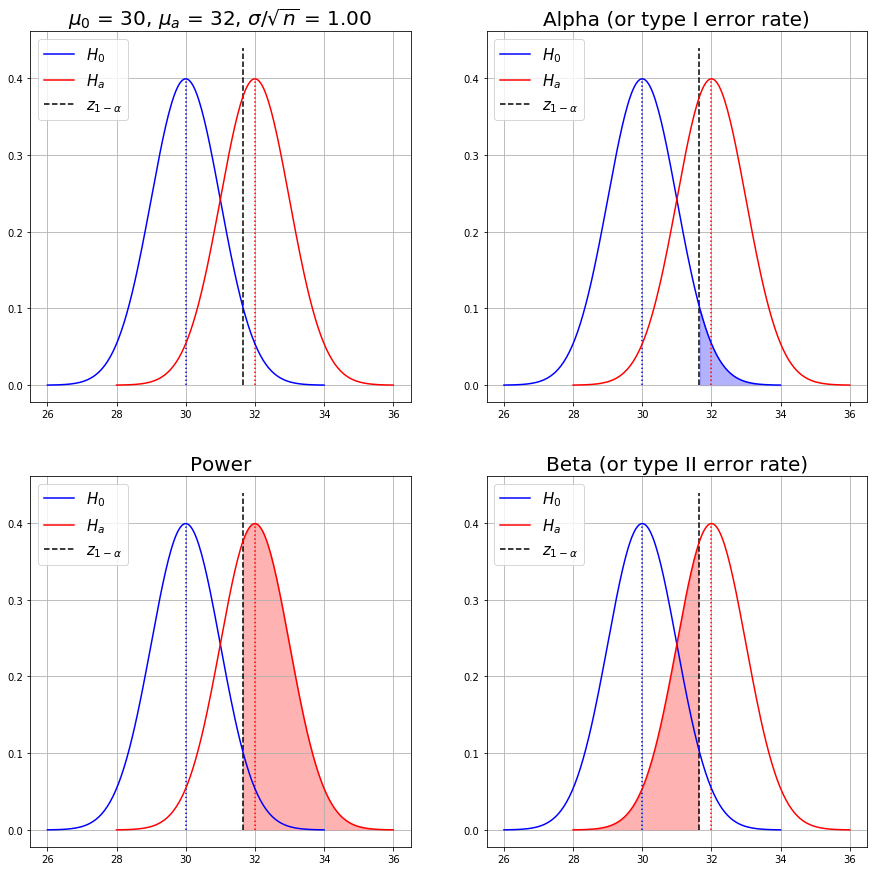

In [13]:
fig, ax = plt.subplots(figsize=(15,15), nrows=2, ncols=2)

plot_dists(ax[0,0], xs_null, ys_null, xs_alter, ys_alter, mu0, mua)

plot_dists(ax[0,1], xs_null, ys_null, xs_alter, ys_alter, mu0, mua)

plot_dists(ax[1,0], xs_null, ys_null, xs_alter, ys_alter, mu0, mua)

plot_dists(ax[1,1], xs_null, ys_null, xs_alter, ys_alter, mu0, mua)

ax[0,0].set_title(r'$\mu_0$ = %d, $\mu_a$ = %d, $\sigma/\sqrt{n}$ = %.2f'%(mu0,mua,std_err), fontsize=20)

sel_alpha = xs_null > z_quantile
ax[0,1].fill_between(x=xs_null[sel_alpha],
               y1=np.zeros_like(xs_null[sel_alpha]),
               y2=ys_null[sel_alpha],
               color='blue', alpha=0.3)

ax[0,1].set_title('Alpha (or type I error rate)', fontsize=20)

sel_power = xs_alter > z_quantile
ax[1,0].fill_between(x=xs_alter[sel_power],
                    y1=np.zeros_like(xs_alter[sel_power]),
                    y2=ys_alter[sel_power],
                    color='red', alpha=0.3)

ax[1,0].set_title('Power', fontsize=20)

sel_beta = np.logical_not(sel_power)
ax[1,1].fill_between(x=xs_alter[sel_beta],
                    y1=np.zeros_like(xs_alter[sel_beta]),
                    y2=ys_alter[sel_beta],
                    color='red', alpha=0.3)

ax[1,1].set_title('Beta (or type II error rate)', fontsize=20)

fig.savefig('power.png')